In [2]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = [8, 4]
import numpy as np
import pandas as pd

'''Horizontally oriented laser'''
df_h = pd.read_csv('HorizontalLaserProfileCSV06_17_2021.csv')
xData_h = df_h['x']
xErr_h = df_h['x_u']
yData_h = df_h['y']
yErr_h = df_h['y_u']
# x: Displacement of razor (inches)
# x_u: Uncertainty in displacement (inches)
# y: Current output due to laser (micro-Amperes)
# y_u: Uncertainty in current (micro-Amperes)
df_h

,x,x_u,y,y_u
0,0.200,0.0005,1265.2,2.002498
1,0.203,0.0005,1265.2,1.004988
2,0.206,0.0005,1263.2,2.002498
3,0.209,0.0005,1262.2,1.004988
4,0.212,0.0005,1262.2,1.004988
...,...,...,...,...
71,0.413,0.0005,1.0,0.141421
72,0.416,0.0005,0.9,0.141421
73,0.419,0.0005,0.9,0.141421
74,0.422,0.0005,0.8,0.141421


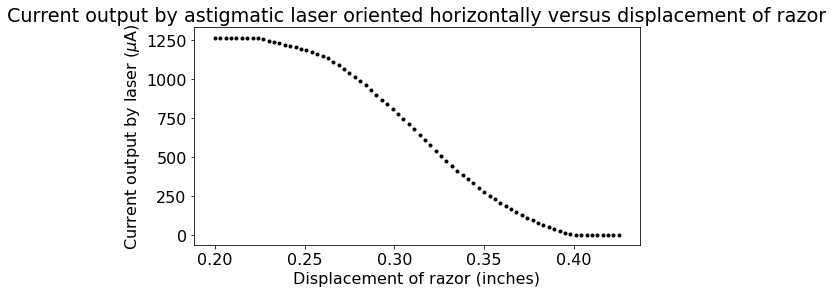

In [3]:
'''Plotting horizontally oriented laser data'''
plt.errorbar(xData_h, yData_h, xerr = xErr_h, yerr = yErr_h, fmt = '.k')
plt.xlabel('Displacement of razor (inches)')
plt.ylabel('Current output by laser ($\mu$A)')
plt.title('Current output by astigmatic laser oriented horizontally versus displacement of razor')
plt.show()

In [4]:
# Univeral domain of graphs:
x = np.linspace(0.190, 0.430, 200)

a_h = 637.84, b_h = 16.18, c_h = 5.09
Standard deviations: σa_h = 1.59, σb_h = 0.12, σc_h = 0.039


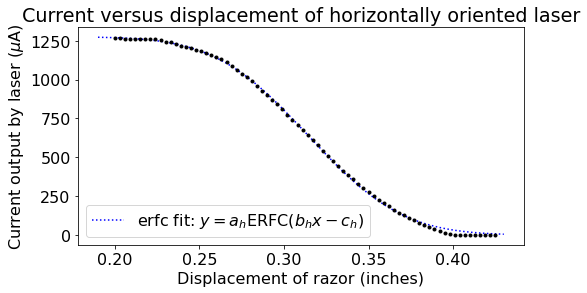

In [5]:
from scipy import special
from scipy.optimize import curve_fit

'''Fit ERFC for horizontally oriented laser data'''
def fit_function(x, a_h, b_h, c_h):
    return a_h * special.erfc(b_h * x - c_h)

popt_h, pcov_h = curve_fit(fit_function, xData_h, yData_h, bounds = ([600, -50, -10], [720, 50, 10]))

# Values of parameters
value_h = tuple(popt_h)
print(f'a_h = {value_h[0]:{1}.{5}}, b_h = {value_h[1]:{1}.{4}}, c_h = {value_h[2]:{1}.{4}}')

# Standard deviation of parameters
stdD_h = tuple(np.sqrt(np.diag(pcov_h)))
print(f'Standard deviations: σa_h = {stdD_h[0]:{1}.{3}}, σb_h = {stdD_h[1]:{1}.{2}}, σc_h = {stdD_h[2]:{1}.{2}}')

plt.errorbar(xData_h, yData_h, xerr = xErr_h, yerr = yErr_h, fmt = '.k');

plt.plot(x, fit_function(x, *popt_h), 'b:',
        label = r'erfc fit: $y = a_{h} $ERFC$\left(b_{h} x - c_{h}\right)$')

plt.xlabel('Displacement of razor (inches)')
plt.ylabel('Current output by laser ($\mu$A)')
plt.title('Current versus displacement of horizontally oriented laser')
plt.legend()

plt.show()

A_h = 11648.29, B_h = 16.2, C_h = 5.09
Standard deviations: σA_h = 90.103, σB_h = 0.1, σC_h = 0.039


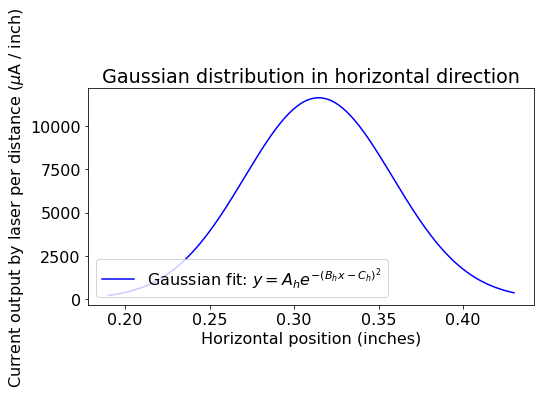

In [6]:
'''Gaussian beam power - horizontal'''

# Assigns values of parameters and std.d of erfc to variables
a_h, b_h, c_h = tuple(popt_h)
aErr_h, bErr_h, cErr_h = stdD_h

# Calculates parameters of Gaussian distribution
A_h = 2 * a_h * b_h / np.sqrt(np.pi)
B_h = b_h
C_h = c_h
# Creating a tuple
coe_h = A_h, B_h, C_h
print(f'A_h = {coe_h[0]:{1}.{7}}, B_h = {coe_h[1]:{1}.{3}}, C_h = {coe_h[2]:{1}.{4}}')

# Calculates standard deviations of parameters of Gaussian distribution
AErr_h = A_h * np.sqrt((aErr_h / a_h) ** 2 + (bErr_h / b_h) ** 2)
BErr_h = bErr_h
CErr_h = cErr_h
coeErr_h = AErr_h, BErr_h, CErr_h
print(f'Standard deviations: σA_h = {coeErr_h[0]:{1}.{5}}, σB_h = {coeErr_h[1]:{1}.{1}}, σC_h = {coeErr_h[2]:{1}.{2}}')

plt.plot(x, A_h * np.exp(-(B_h * x - C_h) ** 2), 'b',
          label= r'Gaussian fit: $y = A_{h} e^{-\left(B_{h} x - C_{h}\right)^{2}}$')

plt.xlabel('Horizontal position (inches)')
plt.ylabel('Current output by laser per distance ($\mu$A / inch)')
plt.title('Gaussian distribution in horizontal direction')
plt.legend(loc = 3)
plt.show()

# Numerical differentiation (central difference)

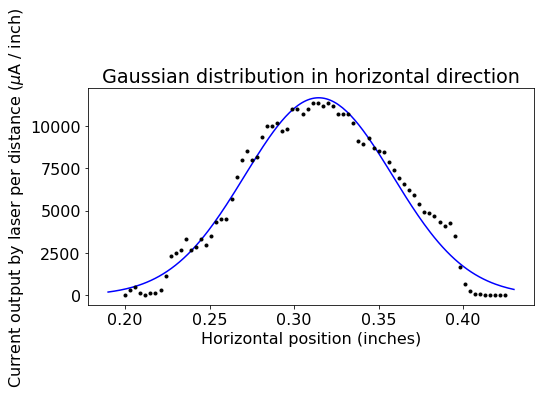

In [7]:
'''Numerical differentiation of ERFC - Horizontal'''

# Using central difference numerical derivative
### Endpoints not included

centralD_h = [0.0] * len(xData_h)
# centralD_h[0] = (yData_h[0] - yData_h[1])/(xData_h[0] - xData_h[1])
for i in range (1, len(yData_h) - 1):
    centralD_h[i] = -1 * (yData_h[i + 1] - yData_h[i - 1])/(xData_h[i + 1] - xData_h[i - 1])
# centralD_h[-1] = (yData_h[-1] - yData_h[-2])/(xData_h[-1] - xData_h[-2])

plt.errorbar(xData_h, centralD_h, fmt = '.k');

plt.plot(x, A_h * np.exp(-(B_h * x - C_h) ** 2), 'b'
#           ,label= r'Gaussian fit: $y = A_{h} e^{-\left(B_{h} x - C_{h}\right)^{2}}$'
        )

plt.xlabel('Horizontal position (inches)')
plt.ylabel('Current output by laser per distance ($\mu$A / inch)')
plt.title('Gaussian distribution in horizontal direction')
# plt.legend(loc = 2)
plt.show()

A_h = 11258.6, B_h = 15.0, C_h = 4.732
Standard deviations: σA_h = 130.2, σB_h = 0.26, σC_h = 0.08


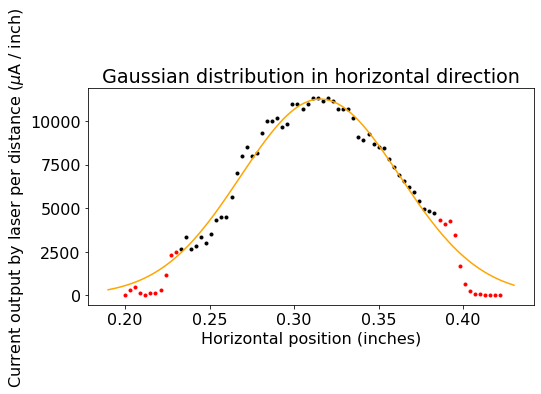

In [12]:
'''Fitting Gaussian to numerical differentiation (central difference) data - Horizontal'''

def fit_function(x, A_h, B_h, C_h):
    return A_h * np.exp(-(B_h * x - C_h)**2)

popt_h, pcov_h = curve_fit(fit_function, xData_h[11:-14], centralD_h[11:-14],
                             bounds = ([10000, 0, 0], [14000, 15, 15]))

value_h = tuple(popt_h)
print(f'A_h = {value_h[0]:{1}.{6}}, B_h = {value_h[1]:{1}.{4}}, C_h = {value_h[2]:{1}.{4}}')

standard_div_h = tuple(np.sqrt(np.diag(pcov_h)))
print(f'Standard deviations: σA_h = {standard_div_h[0]:{1}.{4}}, σB_h = {standard_div_h[1]:{1}.{2}}, σC_h = {standard_div_h[2]:{1}.{2}}' 
      )

plt.scatter(xData_h[0:11], centralD_h[0:11], c='r', marker='.')
plt.scatter(xData_h[11:-14], centralD_h[11:-14], c='k', marker='.'
            , label='Num. derivative: No error bars'
           )
plt.scatter(xData_h[-14:-1], centralD_h[-14:-1], c='r', marker='.')

plt.plot(x, fit_function(x, *popt_h), 'ORANGE'
         , label= r'Fit from numerical derivative'
        )

plt.xlabel('Horizontal position (inches)')
plt.ylabel('Current output by laser per distance ($\mu$A / inch)')
plt.title('Gaussian distribution in horizontal direction')
# plt.legend(loc = 2)
plt.show()

# Finding beam radius (using Gaussian from ERFC parameters)

In [9]:
# Max_h = A_h
# Cutoff_h = 0.1353 * Max_h
# print(Cutoff_h)
# print('\n')

'''Find beam radius, aka $\sigma_{0}$'''
## Note: uses Gaussian from ERFC parameters

# Left bound of beam
x1_h = (C_h - np.sqrt(2)) / B_h
# Right bound of beam
x2_h = (C_h + np.sqrt(2)) / B_h

# Radius of beam
Radius_h = (x2_h - x1_h) / 2

# Center of beam
Center_h = (x1_h + x2_h) / 2

print("Beam in horizontal direction, i.e. oblong direction; all units in inches")
print("Left bound: %f" % x1_h)
print("Right bound: %f" % x2_h)
print("Center: %f" % Center_h)
print("\nHorizontal beam radius: %f inches" % Radius_h)

Beam in horizontal direction, i.e. oblong direction; all units in inches
Left bound: 0.227136
Right bound: 0.401898
Center: 0.314517

Horizontal beam radius: 0.087381 inches
